In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as pyplt

In [2]:
crime=pd.read_csv("C:\\Users\\sunee\\Desktop\\data science total\\assignments\\assignment 7 on clustering\\crime_data.csv")

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Feature Engineering

In [5]:
crime_=crime.iloc[:,1:]

In [6]:
crime_

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [7]:
crime_.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
crime_.shape

(50, 4)

### Data Normalization

In [9]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [10]:
crime_=norm_func(crime_)
crime_

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [11]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

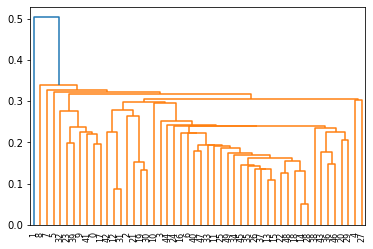

In [12]:
dendogram=sch.dendrogram(sch.linkage(crime_,method='single'))

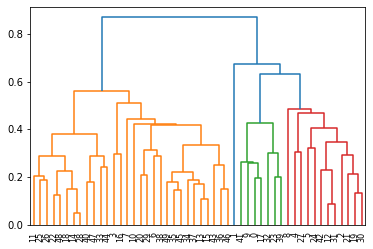

In [13]:
dendogram=sch.dendrogram(sch.linkage(crime_,method='average'))

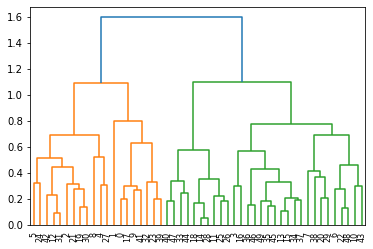

In [14]:
dendogram=sch.dendrogram(sch.linkage(crime_,method='complete'))

### Using hcluster

In [15]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [16]:
AgglomerativeClustering=hc.fit_predict(crime_)
AgglomerativeClustering

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
Cluster_data=pd.DataFrame(AgglomerativeClustering,columns=['clusters'])
Cluster_data

,clusters
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,1
8,2
9,0


In [18]:
crime_['clusters']=Cluster_data['clusters']
crime_.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,3
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,0


In [19]:
crime_[crime_['clusters']==0]

,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,0
9,1.000000,0.568493,0.474576,0.478036,0
10,0.271084,0.003425,0.864407,0.333333,0
11,0.108434,0.256849,0.372881,0.178295,0
12,0.578313,0.698630,0.864407,0.431525,0


In [20]:
crime_[crime_['clusters']==1]

,Murder,Assault,UrbanPop,Rape,clusters
7,0.307229,0.660959,0.677966,0.219638,1


In [21]:
crime_[crime_['clusters']==2]

,Murder,Assault,UrbanPop,Rape,clusters
8,0.879518,0.993151,0.813559,0.635659,2


In [22]:
crime_[crime_['clusters']==3]

,Murder,Assault,UrbanPop,Rape,clusters
1,0.554217,0.746575,0.271186,0.96124,3


In [23]:
crime_1=pd.read_csv("C:\\Users\\sunee\\Desktop\\data science total\\assignments\\assignment 7 on clustering\\crime_data.csv")

In [24]:
crime_1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [25]:
crime_1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [26]:
del crime_1['Unnamed: 0']

In [27]:
crime_1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crime_1)
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [29]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [30]:
import warnings
warnings.filterwarnings('ignore')
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

In [31]:
wcss


[200.0,
 104.96163315756873,
 80.08569526137276,
 57.55425863091106,
 50.05119672966492,
 44.07236225065419,
 39.91391910715028,
 34.687388397849084,
 32.574393885020385]

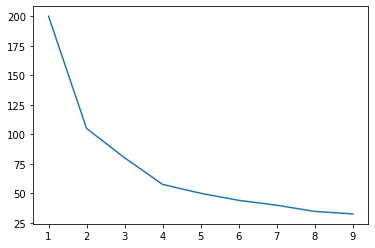

In [32]:
plt.plot(range(1,10),wcss)
plt.show()

In [33]:
x=KMeans(n_clusters=4,max_iter=500,algorithm='auto')
x.fit(crime_1)

KMeans(max_iter=500, n_clusters=4)

In [34]:
k_cluster=x.predict(crime_1)

In [35]:
crime_1['k_clusters']=k_cluster

In [36]:
crime_1.head()

,Murder,Assault,UrbanPop,Rape,k_clusters
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2


In [37]:
crime_1[crime_1['k_clusters']==0]

,Murder,Assault,UrbanPop,Rape,k_clusters
3,8.8,190,50,19.5,0
5,7.9,204,78,38.7,0
9,17.4,211,60,25.8,0
20,4.4,149,85,16.3,0
24,9.0,178,70,28.2,0
29,7.4,159,89,18.8,0
35,6.6,151,68,20.0,0
36,4.9,159,67,29.3,0
38,3.4,174,87,8.3,0
41,13.2,188,59,26.9,0


In [38]:
crime_1[crime_1['k_clusters']==1]

,Murder,Assault,UrbanPop,Rape,k_clusters
10,5.3,46,83,20.2,1
14,2.2,56,57,11.3,1
18,2.1,83,51,7.8,1
22,2.7,72,66,14.9,1
28,2.1,57,56,9.5,1
33,0.8,45,44,7.3,1
40,3.8,86,45,12.8,1
44,2.2,48,32,11.2,1
47,5.7,81,39,9.3,1
48,2.6,53,66,10.8,1


In [39]:
crime_1[crime_1['k_clusters']==2]

,Murder,Assault,UrbanPop,Rape,k_clusters
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
4,9.0,276,91,40.6,2
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,2
12,10.4,249,83,24.0,2
17,15.4,249,66,22.2,2
19,11.3,300,67,27.8,2
21,12.1,255,74,35.1,2


In [40]:
crime_1[crime_1['k_clusters']==3]

,Murder,Assault,UrbanPop,Rape,k_clusters
6,3.3,110,77,11.1,3
11,2.6,120,54,14.2,3
13,7.2,113,65,21.0,3
15,6.0,115,66,18.0,3
16,9.7,109,52,16.3,3
25,6.0,109,53,16.4,3
26,4.3,102,62,16.5,3
34,7.3,120,75,21.4,3
37,6.3,106,72,14.9,3
43,3.2,120,80,22.9,3


### in hirarical cluster and k means cluster has same clusters, but in kmeans clustering each cluster having more data points on compare with hirarical clustering

In [41]:
crime_1.head()

,Murder,Assault,UrbanPop,Rape,k_clusters
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2


In [42]:
crime_=crime_
del crime_['clusters']
crime_.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [43]:
from sklearn.cluster import DBSCAN

In [44]:
dbs=DBSCAN(min_samples=2,eps=0.2)

In [45]:
dbs_cluster=dbs.fit_predict(crime_)
dbs_cluster

array([ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2,  1,  1,  1, -1,
        0,  1,  3, -1,  3,  1,  4, -1,  1,  1, -1,  1, -1,  3,  2, -1,  1,
        1,  1,  5,  1, -1,  4,  1, -1, -1,  5, -1,  1,  5,  1,  1,  1],
      dtype=int64)

In [46]:
crime_['dbs_cluster']=dbs_cluster
crime_

,Murder,Assault,UrbanPop,Rape,dbs_cluster
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,-1
2,0.439759,0.852740,0.813559,0.612403,-1
3,0.481928,0.496575,0.305085,0.315245,-1
4,0.493976,0.791096,1.000000,0.860465,-1
5,0.427711,0.544521,0.779661,0.811370,-1
6,0.150602,0.222603,0.762712,0.098191,-1
7,0.307229,0.660959,0.677966,0.219638,-1
8,0.879518,0.993151,0.813559,0.635659,-1
9,1.000000,0.568493,0.474576,0.478036,-1


In [47]:
crime_[crime_['dbs_cluster']==0]

,Murder,Assault,UrbanPop,Rape,dbs_cluster
0,0.746988,0.65411,0.440678,0.359173,0
17,0.879518,0.69863,0.576271,0.385013,0


In [48]:
crime_[crime_['dbs_cluster']==1]

,Murder,Assault,UrbanPop,Rape,dbs_cluster
11,0.108434,0.256849,0.372881,0.178295,1
13,0.385542,0.232877,0.559322,0.354005,1
14,0.084337,0.037671,0.423729,0.103359,1
15,0.313253,0.239726,0.576271,0.276486,1
18,0.078313,0.130137,0.322034,0.012920,1
22,0.114458,0.092466,0.576271,0.196382,1
25,0.313253,0.219178,0.355932,0.235142,1
26,0.210843,0.195205,0.508475,0.237726,1
28,0.078313,0.041096,0.406780,0.056848,1
33,0.000000,0.000000,0.203390,0.000000,1


In [49]:
crime_[crime_['dbs_cluster']==3]

,Murder,Assault,UrbanPop,Rape,dbs_cluster
19,0.632530,0.873288,0.593220,0.529716,3
21,0.680723,0.719178,0.711864,0.718346,3
30,0.638554,0.821918,0.644068,0.640827,3


In [50]:
crime_[crime_['dbs_cluster']==4]

,Murder,Assault,UrbanPop,Rape,dbs_cluster
23,0.921687,0.732877,0.203390,0.253230,4
39,0.819277,0.801370,0.271186,0.392765,4


In [51]:
crime_[crime_['dbs_cluster']==5]

,Murder,Assault,UrbanPop,Rape,dbs_cluster
36,0.246988,0.390411,0.593220,0.568475,5
43,0.144578,0.256849,0.813559,0.403101,5
46,0.192771,0.342466,0.694915,0.488372,5


#### DBSCAN is optimized all clusters